# Разведочный анализ с использованием `pandas`

Разведочный анализ данных (англ. exploratory data analysis, EDA) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации. Это понятие введено математиком Джоном Тьюки, который сформулировал цели такого анализа следующим образом:
- максимальное «проникновение» в данные,
- выявление основных структур,
- выбор наиболее важных переменных,
- обнаружение отклонений и аномалий,
- проверка основных гипотез,
- разработка начальных моделей.

Предварительная подготовка данных включает в себя очистку, отбор экземпляров, нормализацию, преобразование данных, выделение признаков, отбор признаков. Результатом предварительной обработки данных является конечный тренировочный набор.

Методы предварительной обработки данных:
- Очистка данных используется для обнаружения, исправления или удаления ошибочных записей в наборе данных.
- Нормализация данных используется для стандартизации диапазона значений независимых переменных или признаков данных (например, сведение к интервалам $[0, 1]$ или $[-1, +1]$).
- Преобразование данных используется для приведения данных в формат, удобный для обработки и анализа.
- Выделение признаков используется для преобразования входных данных в набор признаков, которые они хорошо представляют.
- Уплотнение данных используется для преобразования числовых данных в исправленный, упорядоченный и упрощённый вид. Это помогает уменьшить количество и/или размерность данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

Попробуем разобраться со знаменитым набором данных «Титаник».

Крушение лайнера «Титаник» произошло в ночь с 14 на 15 апреля 1912 года из-за столкновения с айсбергом в ледяных водах Северной Атлантики. Крушение произошло во время первого рейса парохода, следовавшего по маршруту Саутгемптон — Шербур — Квинстаун — Нью-Йорк. Трагедия унесла жизни от 1495 до 1635 человек из 2208 - 2225 людях на борту. Всего 712 человек было эвакуировано.  Некоторые группы людей имели больше шансов выжить по сравнению с другими.

Этот набор данных можно использовать для решения задачи прогнозирования жизни конкретного пассажира.

Данные для исследования находятся вот [здесь](https://www.kaggle.com/competitions/titanic/data).

В состав предлагаемого датасета включены 2 набора данных: обучающий (`train`) и тестовый (`test`).

Для повторения работы с библиотекой `pandas`, визуализации данных и обучения основам разведочного анализа мы будем работать с обучающим набором данных (`train`).

In [2]:
train = pd.read_csv('C:/Users/leous/.vscode/Data_Mining/content/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В различных истониках этот набор данных уже хорошо описан, так что вопользуемся готовым описанием полей:

1. **PassengerId**: Уникальный индекс/номер строки. Это поле можно рассматривать как идентификатор пассажира.
1. **Survived**: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что пассажиру удалось выжить, и 0 - не удалось.
1. **Pclass**: Класс обслуживания пассажира. 1 - первый (высший) класс обслуживания, 2 - второй (средний) класс обслуживания, 3 - третий (низший) класс обслуживания.
1. **Name**: Имя пассажира. Имя также может содержать титулы и обращения - "Mr" для мужчин; "Mrs" для женщин; "Miss" для девушек; "Master" для юношей.
1. **Sex**: Пол пассажира: мужчины (male), женщины (female).
1. **Age**: Возраст пассажира. Здесь приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.
1. **SibSp**: (анг. Sibling (брат или сестра); Spouse (супруг)) Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
1. **Parch**: Количество родителей, путешествующих вместе с ребенком.
1. **Ticket**: Номер билета.
1. **Fare**: Стоимость билета.
1. **Cabin**: Номер каюты пассажира.
1. **Embarked**: Порт отправления данного пассажира (C — Шербур; Q — Квинстаун; S — Саутгемптон).

Продолжаем исследовать обучающий набор данных. Посмотрим на общую статистику числовых данных.

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Вспомните, что обозначают эти результаты? Какие предварительные выводы можно сделать из этих данных?

Проанализируем нечисловые данные.

In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Разберемся, что обозначают эти поля и значения.

`count` - количество непустых значений. Обратите внимание, что количество проставленных номеров кают - 204, а проставленных портов посадки - 889. Всего же записей в таблице - 891.

`unique` - количество уникальных записей. Очевидно, что все имена пассажиров из этой таблицы известны, а вот номеров кают всего 147.

`top` - наиболее часто повторяющаяся запись.

`freq` - частота самой частой записи. Эти две строки интересно анализировать вместе. В этом наборе данных большинство мужчины - 577; 644 человека сели на борт в Саутгемптоне; по билету 347082 путешествовало семь человек.

Что еще вы можете сказать, глядя на эту таблицу?

Например, интересно было бы рассмотреть подробее, какие пассажиры прошли по билету '347082'.

Метод `describe` приводит общую статистику по конкретным полям таблицы. Но для полного представления о данных нужно знать типы полей, количество непустых записей и т.п.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Заполнение пропусков

Очень важным шагом является обнаружение недостающих значений. На этом этапе анализа не обязательно заполнять недостающие значения, но нужно разобраться в их сущности, чтобы  в дальнейшем понять, как заполнить их.

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Подумайте, как заполнить недостающие значения в поле Age (возраст), Cabin (каюта), Embarked (порт посадки)? Всегда ли это возможно?


Заполнить пропуски в категориальных признаках можно следующими способами:
- Заменить пропущенное значение новой категорией "Неизвестно".
- Заменить пропущенное значение наиболее популярным значением.

Для числовых признаков можно использовать усечённое среднее или медиану.

Существует 3 вида пропусков: полностью случайные, случайные и неслучайные. Восстановить автоматически возможно (по крайней мере теоретически) только пропуски первого типа.

Попробуем заменить пропуски в поле Age. Сначала посмотрим подробнее на это поле.

In [8]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
train['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

Заменим пропуски на медианное значение. Как вы думаете, правильно ли мы делаем?

In [10]:
train.Age = train.Age.fillna(train.Age.median())
train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Что касается порта посадки, у нас есть всего 2 записи, для которых он неизвестен.

In [11]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


В данном случае можно не пытаться угадать, потому что на самом-то деле он известен: https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

`Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.`

In [12]:
train.Embarked.fillna('S', inplace=True)

Информативно заполнить пропущенные значения столбца `Cabin` не представляется возможным, но можно использовать ещё один способ борьбы с пропусками — удаление ;-) В данном случае удалим столбец.

In [13]:
train.drop(columns=['Cabin'], inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Визуализация распределений и взаимосвязей

Поговорим о признаках, которые можно выделить при анализе этих данных. Вы знаете, что выделяют количественные (числовые), категориальные и бинарные признаки.

Разделите признаки по этим типам. Можно ли считать поле `Cabin` числовым признаком?

Выделяют визуализацию по одному признаку и во взаимосвязи признаков.

Для визуализации воспользуемся библиотекой `matplotlib`. Построим гистограмму, демонстрирующую количество выживших в этом наборе данных.

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

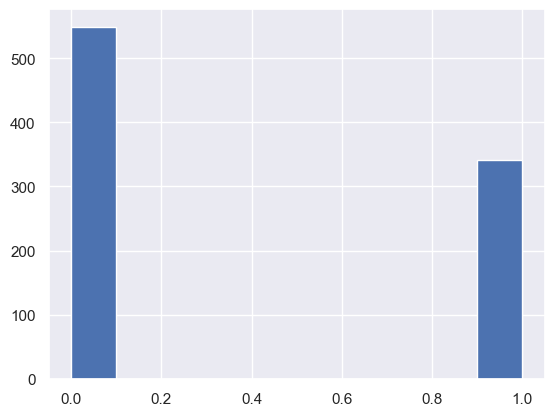

In [14]:
plt.hist(train['Survived'])

Для визуализации данных существует огромное количество библиотек для Python. Одной из самых популярных является библиотека `seaborn`, которая, по сути, представляет собой надстройку над `matplotlib`.

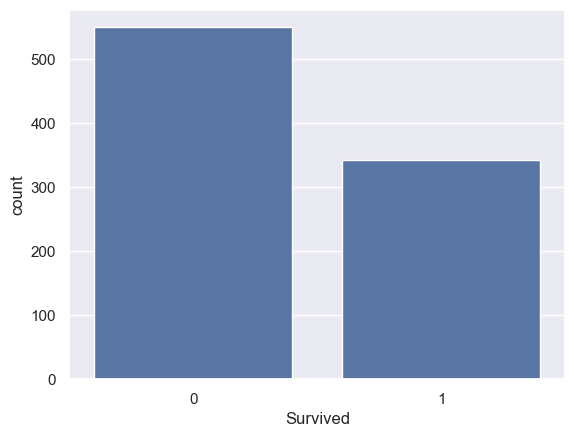

In [15]:
sns.countplot(x=train["Survived"]);

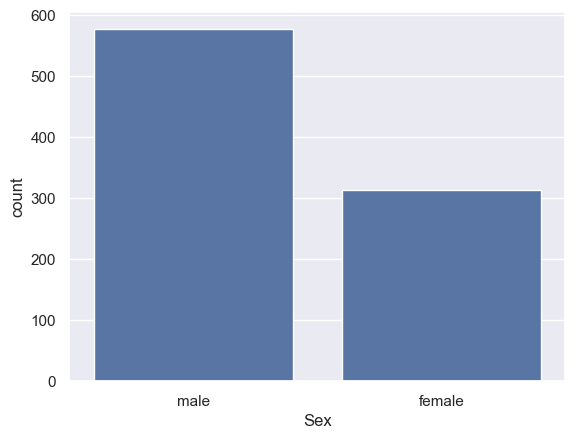

In [16]:
sns.countplot(x=train["Sex"]);

Посмотрите на гистограмму, полученную ячейкой выше. Соответствует ли она выводам, которые мы сделали после применения `discribe`?

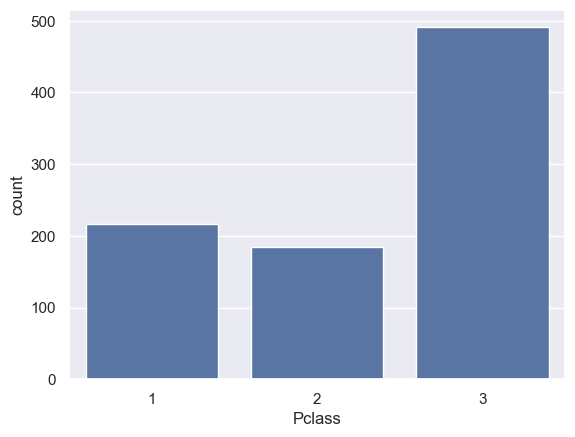

In [17]:
sns.countplot(x=train["Pclass"]);

Подтвердились ли наши выводы о количестве пассажиров разного класса обслуживания?



Но больше информации мы можем получить из визуализации взаимосвязи пар признаков.

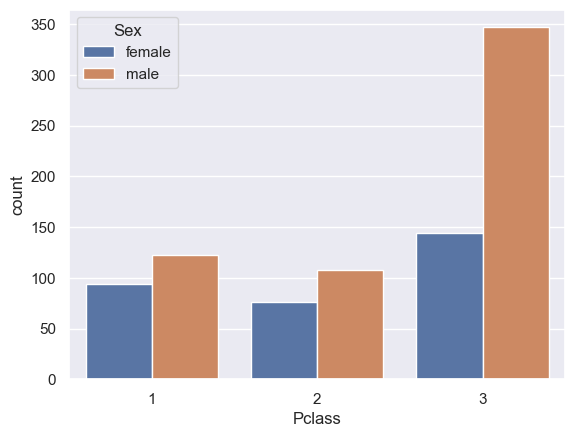

In [18]:
sns.countplot(data=train, x="Pclass", hue='Sex');

Какие выводы можно сделать, глядя на гистограмму выше? Почему нужно знать экономическую ситуацию в Англии и Ирландии, чтобы понять эту картинку?

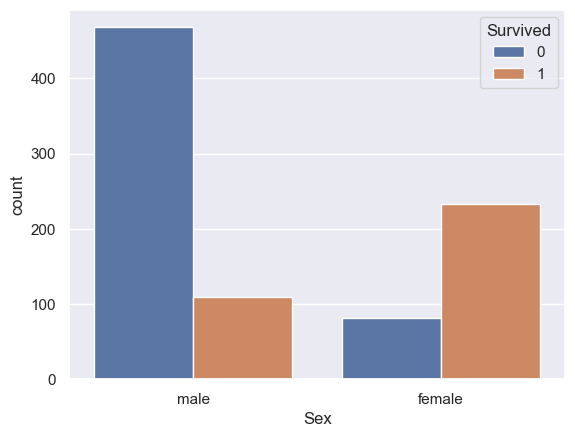

In [19]:
sns.countplot(data=train, x="Sex", hue='Survived');

А чем объяснить эту взаимосвязь?

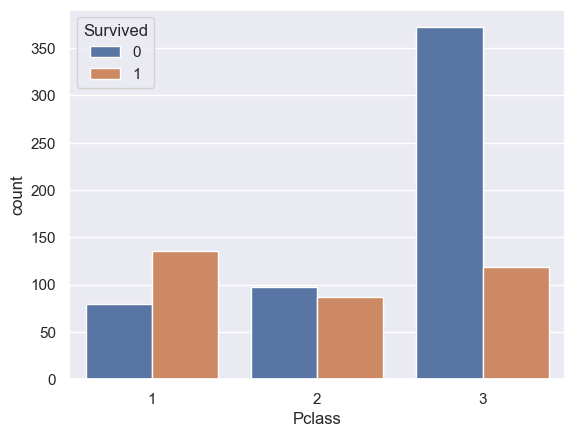

In [20]:
sns.countplot(data=train, x="Pclass", hue='Survived');

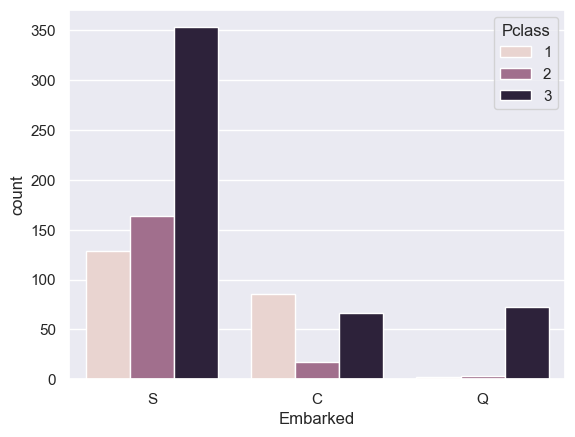

In [21]:
sns.countplot(data=train, x='Embarked', hue='Pclass');

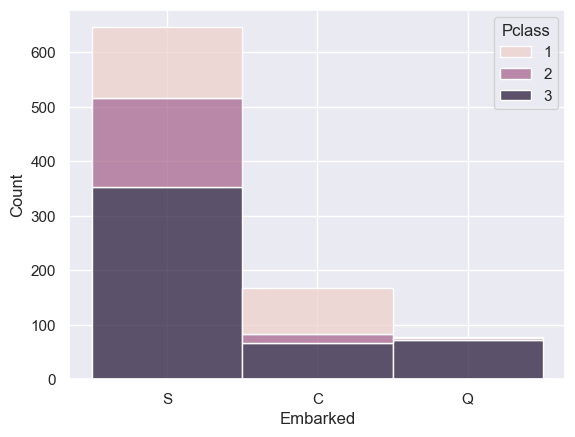

In [22]:
sns.histplot(train, x="Embarked", hue="Pclass", multiple="stack");

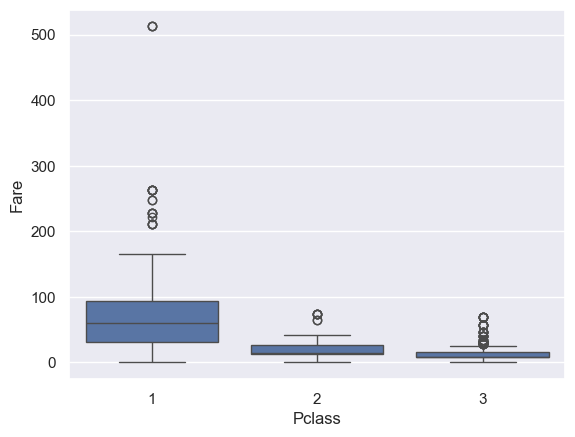

In [23]:
sns.boxplot(data=train, y='Fare', x='Pclass');

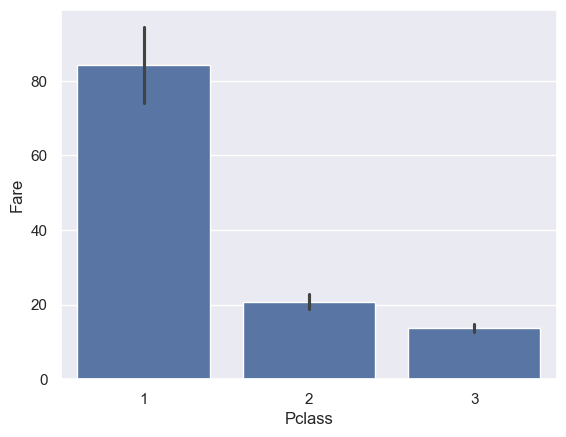

In [24]:
sns.barplot(data=train, x="Pclass", y='Fare');

Или так... Какую гистограмму легче анализировать?

Попробуйте сделать полезные умозаключения, гляда на полученные гистограммы. Это нужно делать для того, чтобы определить важные для построения модели машинного обучения признаки (и неважные тоже :))

Еще раз посмотрим на распределение возраста людей, описанных в этом наборе данных.

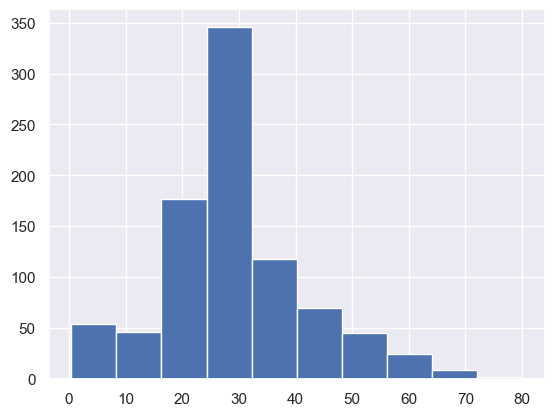

In [25]:
train.Age.hist();

Попробуем совместить на одном графике возраст и информацию о выживаемости этих людей.

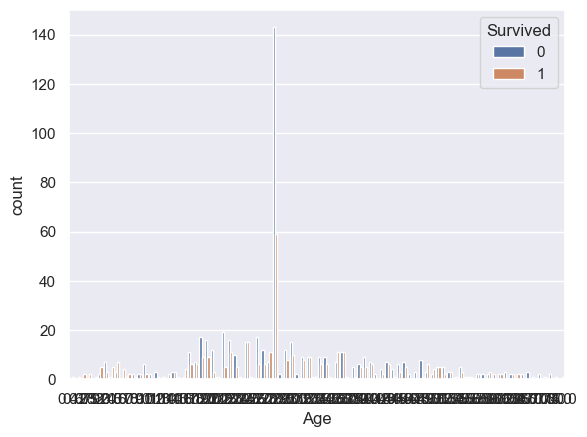

In [26]:
sns.countplot(data=train, x="Age", hue='Survived');

Нетрудно заметить, что эта гистограмма не читаема, нужно сделать по-другому, например, сгруппировать данные по диапазонам возрастов.

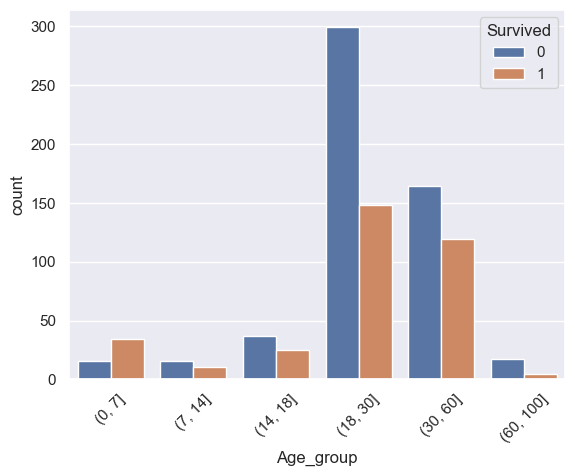

In [27]:
train["Age_group"] = pd.cut(x=train['Age'], bins=[0, 7, 14, 18, 30, 60, 100])
plt.xticks(rotation=45)
sns.countplot(data=train, hue='Survived', x='Age_group');

Какие еще зависимости пар признаков можно было бы визуализовать, чтобы выделить важные для исследования признаки?

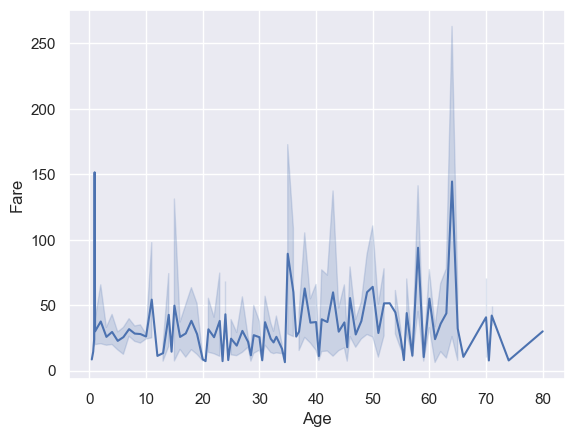

In [28]:
sns.lineplot(data=train, x='Age', y='Fare');

Кажется, на Титанике не было «детских билетов».

C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


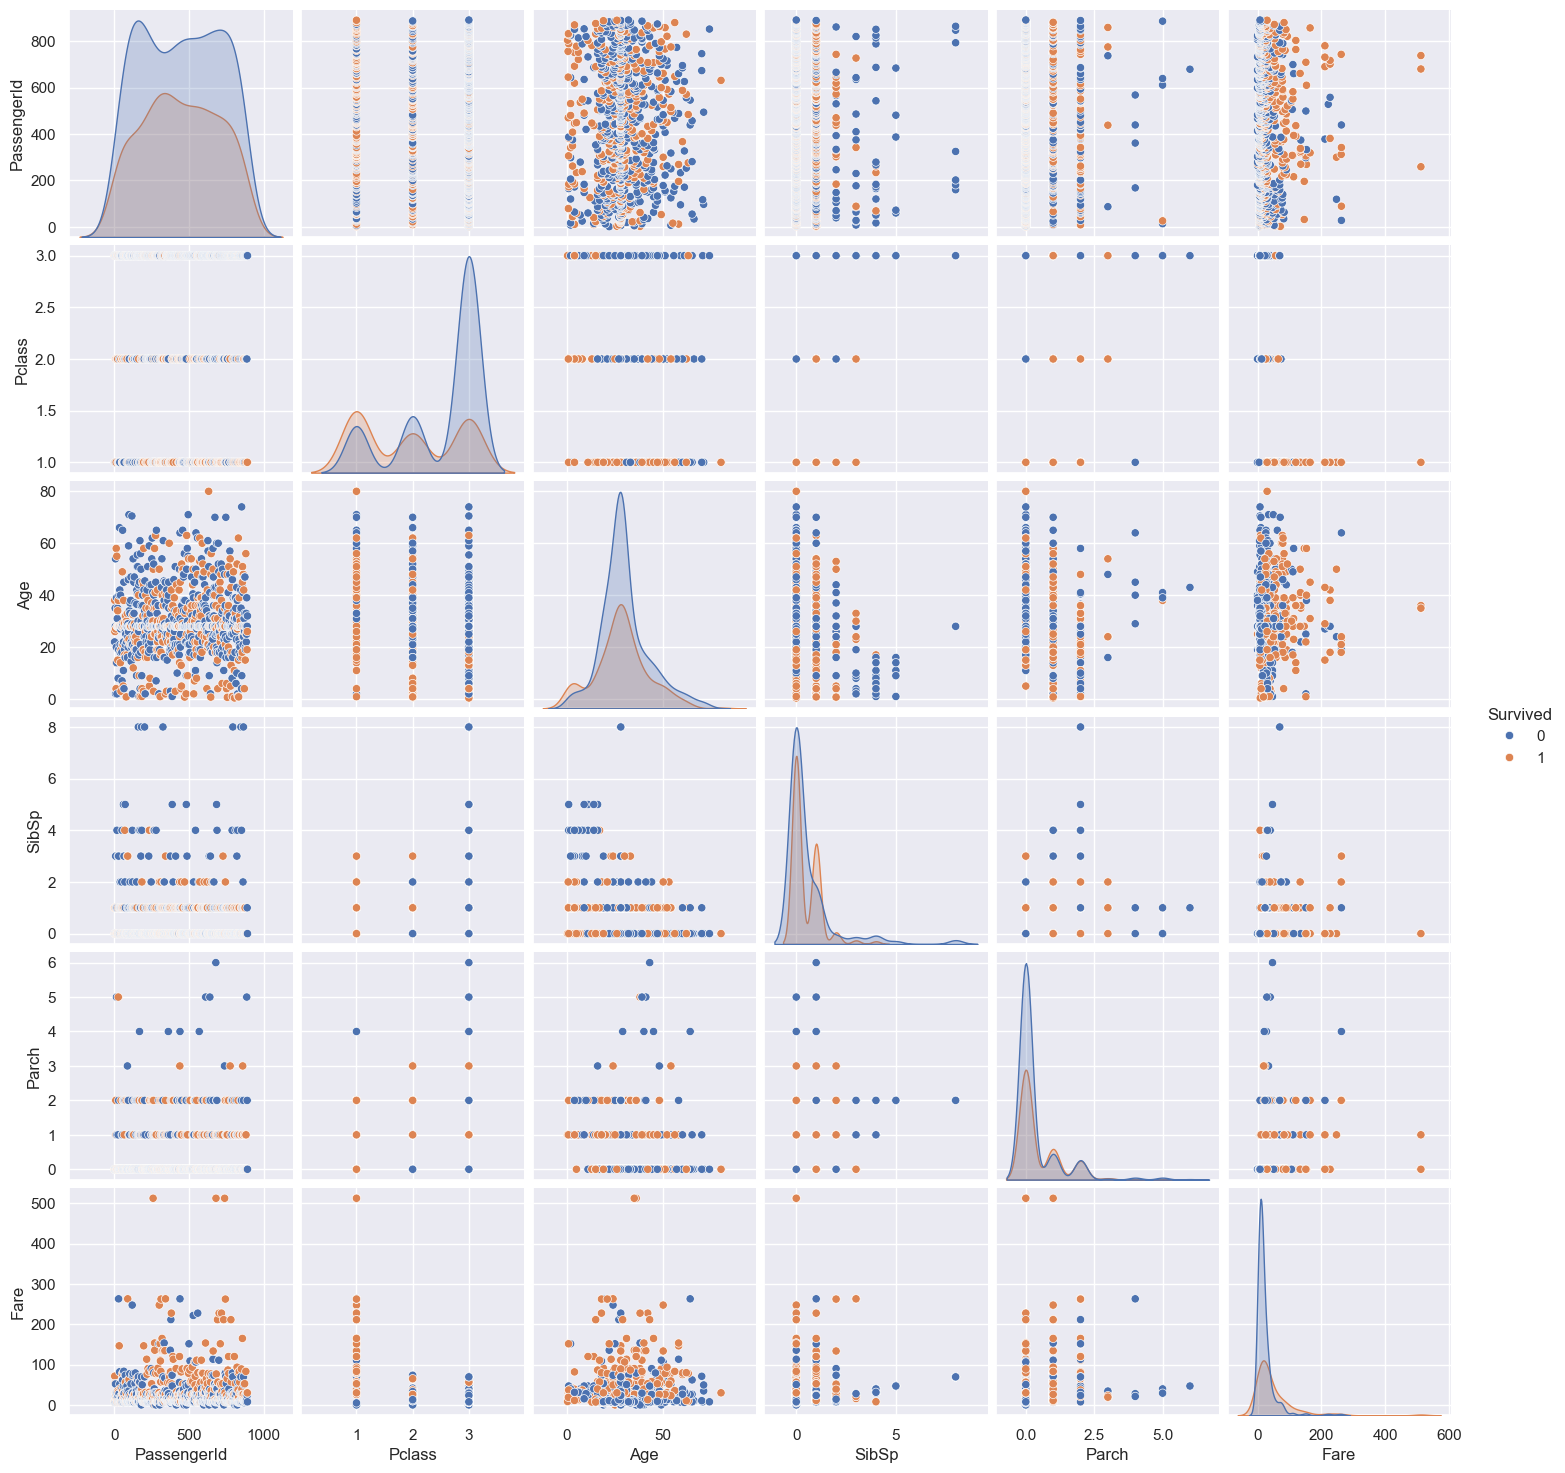

In [29]:
sns.pairplot(train, kind="scatter", hue="Survived");

## Нормализация

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

1. Мин-макс нормализация преобразует каждое значение данных в значение от 0 до 1

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

2. Средняя нормализация масштабирует значения таким образом, чтобы среднее значение всех значений было равно 0, а стандартное отклонение (дисперсия) -  1.

$$x_{norm}=\frac{x-x_{mean}}{x_{std}}$$

Проведем нормализацию значений возраста и стоимости билета.
Нормализацию можно провести вручную с использованием приведенных выше формул, а можно воспользоваться инструментами библиотеки `scikit-learn.preprocessing`

Для разных моделей нужна разная нормализация: для метрических моделей (например, KNN) нужна минимакс нормализация, а для линейных (например, SVM) z-нормализация (стандартизация). https://scikit-learn.org/stable/modules/preprocessing.html

И снова построим график зависимости.

In [30]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

train[['mmAge', 'mmFare']] = scaler_mm.fit_transform(train[['Age', 'Fare']])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,mmAge,mmFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(18, 30]",0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 60]",0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(18, 30]",0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 60]",0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 60]",0.434531,0.015713


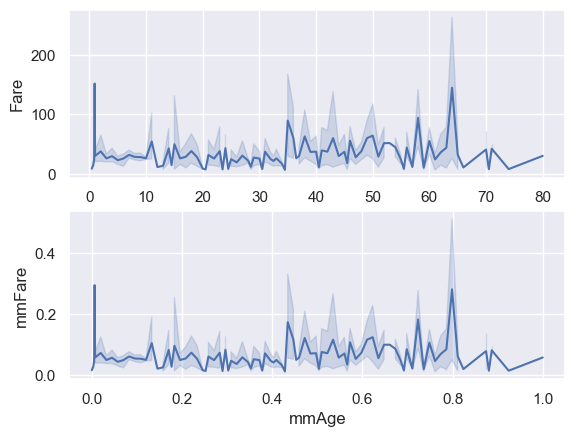

In [31]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=train, x='Age', y='Fare', ax=axs[0])
sns.lineplot(data=train, x='mmAge', y='mmFare', ax=axs[1]);

## Кодирование категориальных признаков

`OrdinalEncoder` и `OneHotEncoder` - часть библиотеки `scikit-learn` в Python и используются для преобразования категориальных или текстовых признаков в числа, которые предсказательные модели понимают лучше.

`sklearn.preprocessing.OrdinalEncoder` раздает категориальным признакам значения от 0 до $n$, где $n$ - это количество различных значений в данном столбце. Это может быть неправильно, так как может запутать модель машинного обучения, наложив на значения числовой порядок.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Sex', 'Ticket']] = enc.fit_transform(train[['Sex', 'Ticket']])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,mmAge,mmFare
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,S,"(18, 30]",0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,C,"(30, 60]",0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,S,"(18, 30]",0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,49.0,53.1000,S,"(30, 60]",0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,472.0,8.0500,S,"(30, 60]",0.434531,0.015713


In [33]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['110152', '110413', '110465', '110564', '110813', '111240',
        '111320', '111361', '111369', '111426', '111427', '111428',
        '112050', '112052', '112053', '112058', '112059', '112277',
        '112379', '113028', '113043', '113050', '113051', '113055',
        '113056', '113059', '113501', '113503', '113505', '113509',
        '113510', '113514', '113572', '113760', '113767', '113773',
        '113776', '113781', '113783', '113784', '113786', '113787',
        '113788', '113789', '113792', '113794', '113796', '113798',
        '113800', '113803', '113804', '113806', '113807', '11668', '11751',
        '11752', '11753', '11755', '11765', '11767', '11769', '11771',
        '11774', '11813', '11967', '12233', '12460', '12749', '13049',
        '13213', '13214', '13502', '13507', '13509', '13567', '13568',
        '14311', '14312', '14313', '14973', '1601', '16966', '16988',
        '17421', '17453', '17463', '17464', '17465', '1

Итак, главный недостаток `OrdinalEncoder`'a — создание избыточных зависимостей в данных.

Если это критично, то лучше использовать `sklearn.preprocessing.OneHotEncoder`

https://scikit-learn.org//stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
res = enc.fit_transform(train[['Embarked']])
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [35]:
enc.categories_[0]

array(['C', 'Q', 'S'], dtype=object)

In [36]:
res.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [37]:
train[enc.categories_[0]] = res.toarray()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,mmAge,mmFare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,S,"(18, 30]",0.271174,0.014151,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,C,"(30, 60]",0.472229,0.139136,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,S,"(18, 30]",0.321438,0.015469,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,49.0,53.1000,S,"(30, 60]",0.434531,0.103644,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,472.0,8.0500,S,"(30, 60]",0.434531,0.015713,0.0,0.0,1.0


Главный недостаток `OneHotEncoder`'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков.

Для кодирования целевых меток используется `LabelEncoder`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Корреляция - важнейший фактор, лежащий в основе анализа данных. Корреляция показывает, как переменные в наборе данных связаны друг с другом и как они изменяются относительно друг друга. Значение корреляции колеблется от -1 до +1. Нулевая корреляция означает, что две переменные не зависят друг от друга. Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.

Тепловая карта используется для графического представления значений корреляционной матрицы с разными цветовыми оттенками для разных значений.

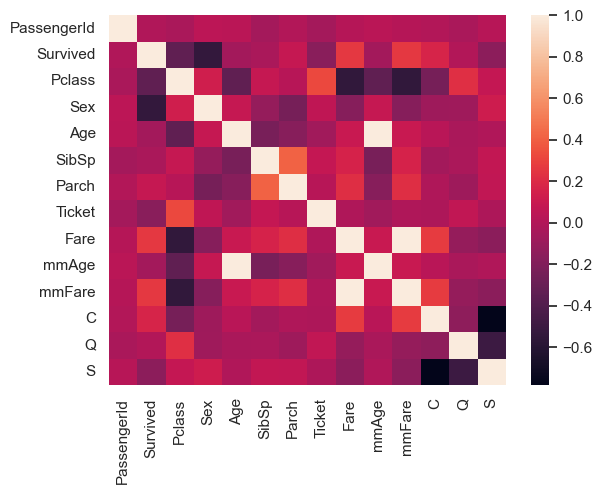

In [38]:
sns.heatmap(train.corr(numeric_only = True));

Какие выводы можно сделать, анализируя эту матрицу? Какие признаки можно назвать существенными для выживаемости, а какие нет?

Дополнительные вопросы:
*   Есть ли среди наших данных дубликаты?
*   А как насчёт выбросов и аномалий? Если есть, можно/нужно ли их удалить?
*   Какие ещё есть способы заполнить пропуски значений возраста? Зависит ли распределение возраста от класса обслуживания? пола? Можно ли извлечь пользу из обращений (Mr, Mrs, Miss, Master и т.п.) в столбце `Name`?

`titanic['Age'] = titanic.groupby('Sex')['Age'].transform(lambda x:
                                                         x.fillna(x.median()))`

*   Полезно ли будет преобразовать или создать какие-то ещё признаки? Например, добавить бинарный признак "путешествует с родителями", подсчитать суммарное количество путешествующих совместно (семьёй), пересчитать стоимость билетов с учётом количества пассажиров, прошедших по каждому билету?

Что дальше?

Это начало лабораторной работы по Классификации.

Забираем любой датасет (кроме Iris, Wine, Abalon) по ссылке (внутри группы все датасеты должны быть разными):

 https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=25&sort=desc&orderBy=NumHits&search=&Types=Tabular&Types=Text

  
1 часть
 1. Скачать один из наборов данных
 1. Загрузить данные в датафрейм
 1. Вывести статистическую информацию о наборе данных
 1. Вывести названия столбцов и строк
 1. Заменить категориальные данные количественными
 1. Визуализировать данные с помощью Matplotlib и Seaborn
   1. Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!
   1. Должно быть не менее 3х групповых визуализаций


